# Intro
Simple Program to load and check the 4STAR archive files.

For RA of KORUS-AQ, aod and Gases

# Load the defaults and imports

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth
from linfit import linfit
from path_utils import getpath
from plotting_utils import make_boxplot

In [2]:
%matplotlib notebook

In [3]:
fp =getpath('KORUS')#'C:/Userds/sleblan2/Research/ORACLES/'
fp

Return path named:  KORUS /mnt/c/Users/sleblanc/Research/KORUS-AQ/


u'/mnt/c/Users/sleblanc/Research/KORUS-AQ/'

In [7]:
vr='R2'

# load the files

In [8]:
days = ['20160501','20160503','20160504','20160506','20160510','20160511',
        '20160512','20160516','20160517','20160519','20160521','20160524',
        '20160526','20160529','20160601','20160602','20160604','20160608',
        '20160609','20160614']#,'20160617','20160618']

In [23]:
days = ['20160501','20160506','20160512','20160517','20160526','20160614']

In [6]:
days = ['20160516']

In [9]:
outaod_RA = []
outaod_head_RA = []
outgas_RA = []
outgas_head_RA = []
for d in days:
    fname_aod = fp+'aod_ict/{vr}/korusaq-4STAR-AOD_DC8_{d}_{vr}.ict'.format(vr=vr,d=d)
    tt,th = load_ict(fname_aod,return_header=True)
    outaod_RA.append(tt)
    outaod_head_RA.append(th)
    
    #fname_gas = fp+'gas_ict/korusaq-4STAR-GASES_DC8_{}_RA.ict'.format(d)
    #ttr,thr = load_ict(fname_gas,return_header=True)
    #outgas_RA.append(ttr)
    #outgas_head_RA.append(thr)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0675', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1559', 'UNCAOD1627')
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0675', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1559', 'UNCAOD1627'

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0675', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1559', 'UNCAOD1627')
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0675', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1559', 'UNCAOD1627'

In [6]:
for i,s in enumerate(outaod_head_RA[0]):
    for ig,g in enumerate(outaod_head_RA):
        if not s==g[i]:
            print 'no match on RA aod string line {}: {} and RA of num {}:{} '.format(i,s,ig,g[i])
    for ir,r in enumerate(outgas_head_RA):
        if not s==r[i]:
            print 'no match on RA gas string line {}: {} and RA of num {}:{} '.format(i,s,ir,r[i])

no match on RA gas string line 0: 56, 1001
 and RA of num 0:49, 1001
 
no match on RA gas string line 0: 56, 1001
 and RA of num 1:49, 1001
 
no match on RA gas string line 0: 56, 1001
 and RA of num 2:49, 1001
 
no match on RA gas string line 0: 56, 1001
 and RA of num 3:49, 1001
 
no match on RA aod string line 6: 2016, 05, 01, 2016, 05, 10
 and RA of num 1:2016, 05, 03, 2016, 05, 10
 
no match on RA aod string line 6: 2016, 05, 01, 2016, 05, 10
 and RA of num 2:2016, 05, 04, 2016, 05, 10
 
no match on RA aod string line 6: 2016, 05, 01, 2016, 05, 10
 and RA of num 3:2016, 05, 06, 2016, 05, 10
 
no match on RA gas string line 6: 2016, 05, 01, 2016, 05, 10
 and RA of num 1:2016, 05, 03, 2016, 05, 10
 
no match on RA gas string line 6: 2016, 05, 01, 2016, 05, 10
 and RA of num 2:2016, 05, 04, 2016, 05, 10
 
no match on RA gas string line 6: 2016, 05, 01, 2016, 05, 10
 and RA of num 3:2016, 05, 06, 2016, 05, 10
 
no match on RA aod string line 8: Start_UTC, seconds, Elapsed seconds from

IndexError: list index out of range

In [8]:
print 'day:       AOD RA     GAS RA'
for i,d in enumerate(days):
    try:
        print '{}: {}  {}'.format(d,len(outaod_RA[i]['Start_UTC']),len(outgas_RA[i]['Start_UTC']))
    except:
        print '{}: missed'.format(d)

day:       AOD RA     GAS RA
20160516: missed


In [10]:
outaod_head_RA[0]

['76, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'KORUS-AQ\n',
 '1, 1\n',
 '2016, 05, 01, 2017, 07, 08\n',
 '1\n',
 'Start_UTC, seconds, Elapsed seconds from 0 hours UT on day: 20160501\n',
 '39\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 '-9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999\n',
 'Latitude, deg, Aircraft latitude (deg) at the indicated time\n',
 'Longitude, deg, Aircraft longitude (deg) at the indicated time\n',
 'GPS_Alt, m, Aircraft GPS geometric altitude (m) at the indicated time\n',
 'qual_flag, unitless, quality of retrieved AOD: 0=good; 1=poor, due to clouds, tracking e

In [9]:
outgas_head_RA[0]

['49, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'KORUS-AQ\n',
 '1, 1\n',
 '2016, 05, 01, 2016, 05, 10\n',
 '1\n',
 'Start_UTC, seconds, Elapsed seconds from 0 hours UT on day: 20160501\n',
 '15\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 '-9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999\n',
 'Latitude, deg, Aircraft latitude (deg) at the indicated time\n',
 'Longitude, deg, Aircraft longitude (deg) at the indicated time\n',
 'GPS_Alt, m, Aircraft GPS geometric altitude (m) at the indicated time\n',
 'amass_O3, unitless, ozone optical airmass\n',
 'amass_NO2, unitless, NO2 optical airmass\n',
 'CWV, g/cm^2, column water vapor calculated as average of values retrieved in 940-960 nm band\n',
 'std_CWV, g/cm^2, standard deviation of CWV\n',
 'QA_CWV, unitless, quality of retrieved CWV: 0=good; 1=poor, due to clouds, tracking e

In [11]:
nm = outaod_RA[0].dtype.names

In [12]:
nm

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'qual_flag',
 'amass_aer',
 'AOD0380',
 'AOD0452',
 'AOD0501',
 'AOD0520',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0675',
 'AOD0781',
 'AOD0865',
 'AOD1020',
 'AOD1040',
 'AOD1064',
 'AOD1236',
 'AOD1559',
 'AOD1627',
 'UNCAOD0380',
 'UNCAOD0452',
 'UNCAOD0501',
 'UNCAOD0520',
 'UNCAOD0532',
 'UNCAOD0550',
 'UNCAOD0606',
 'UNCAOD0620',
 'UNCAOD0675',
 'UNCAOD0781',
 'UNCAOD0865',
 'UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1559',
 'UNCAOD1627')

In [13]:
wl = nm[6:-1]

<IPython.core.display.Javascript object>


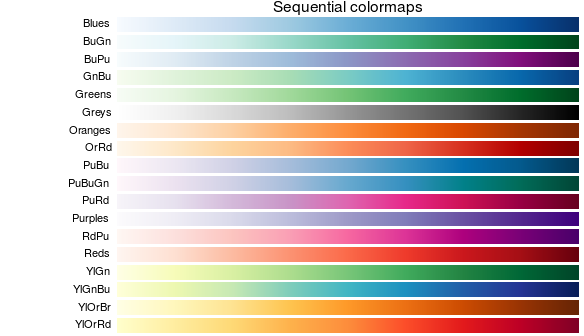

<IPython.core.display.Javascript object>


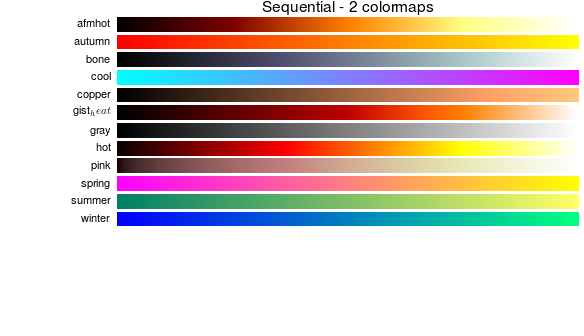

<IPython.core.display.Javascript object>


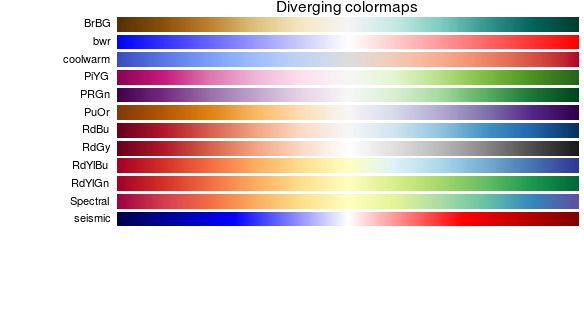

<IPython.core.display.Javascript object>


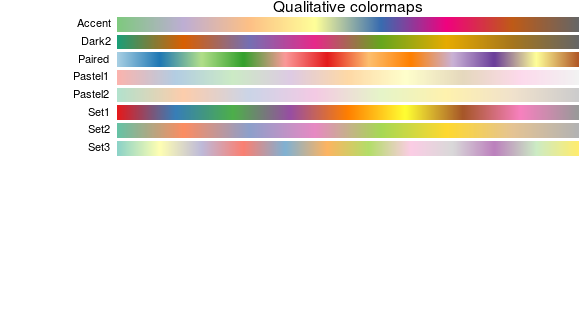

<IPython.core.display.Javascript object>


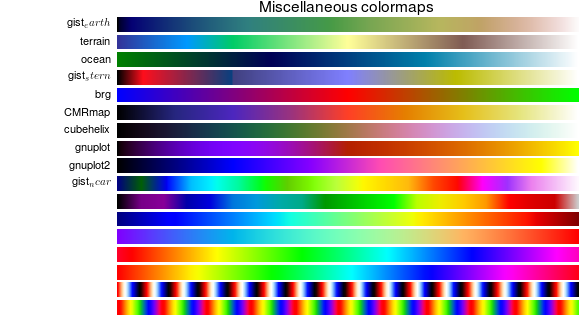

In [105]:
cmaps.cmaps()

In [15]:
for a in wl:
    print a

AOD0380
AOD0452
AOD0501
AOD0520
AOD0532
AOD0550
AOD0606
AOD0620
AOD0675
AOD0781
AOD0865
AOD1020
AOD1040
AOD1064
AOD1236
AOD1559
AOD1627
UNCAOD0380
UNCAOD0452
UNCAOD0501
UNCAOD0520
UNCAOD0532
UNCAOD0550
UNCAOD0606
UNCAOD0620
UNCAOD0675
UNCAOD0781
UNCAOD0865
UNCAOD1020
UNCAOD1040
UNCAOD1064
UNCAOD1236
UNCAOD1559


In [13]:
wl = wl[0:16]

<IPython.core.display.Javascript object>


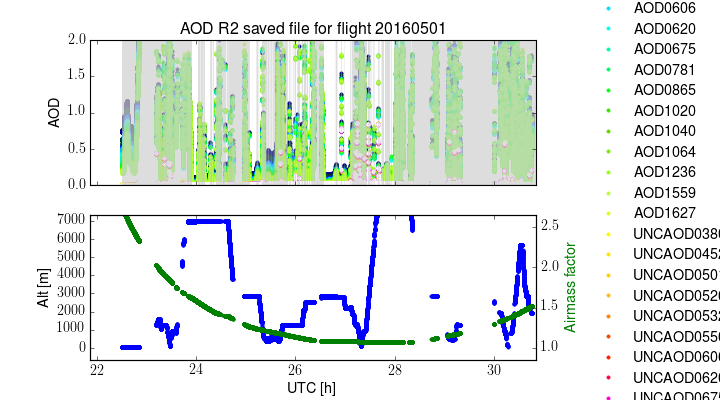

/usr/lib/python2.7/dist-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


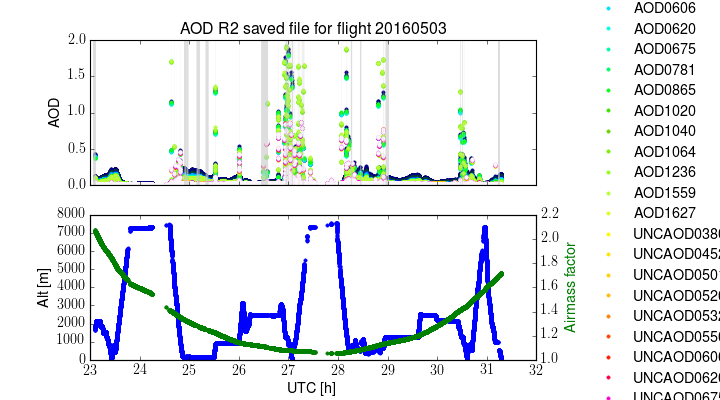

<IPython.core.display.Javascript object>


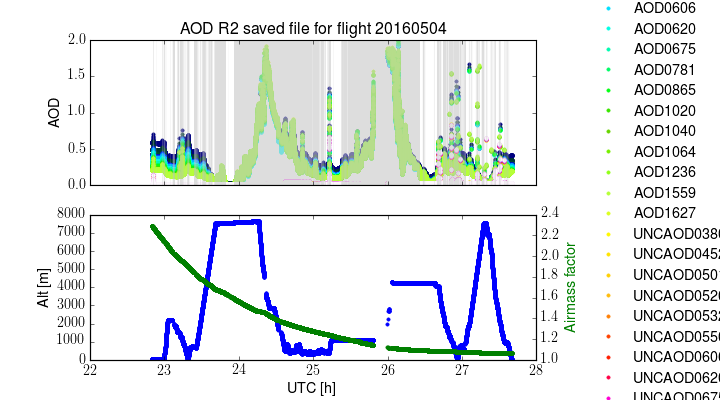

<IPython.core.display.Javascript object>


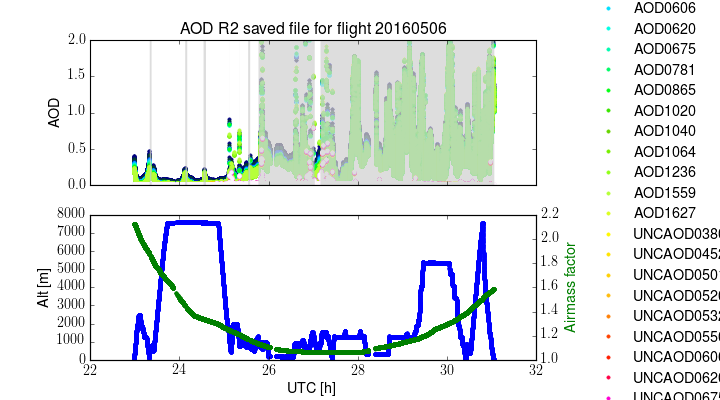

<IPython.core.display.Javascript object>


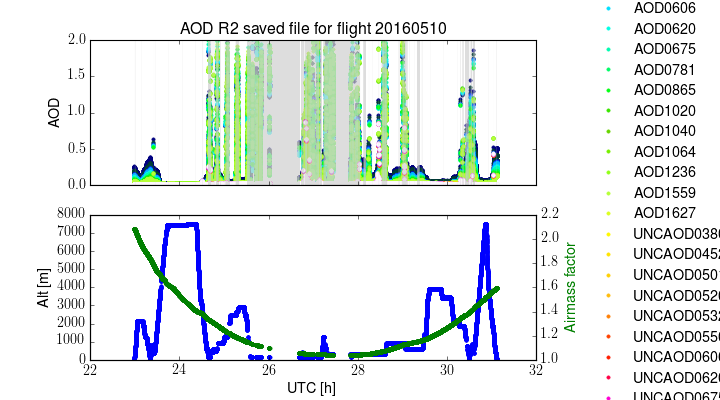

<IPython.core.display.Javascript object>


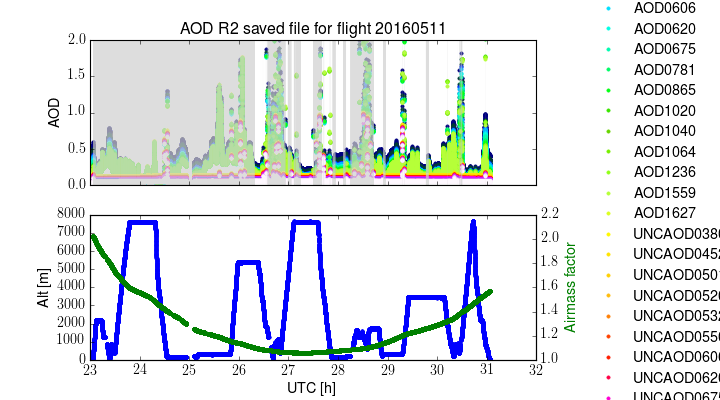

<IPython.core.display.Javascript object>


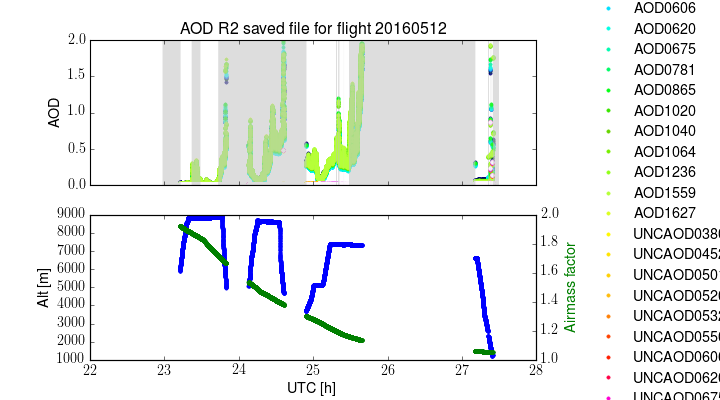

<IPython.core.display.Javascript object>


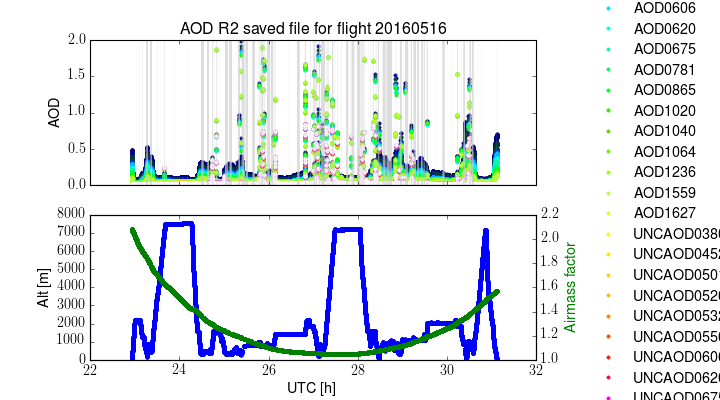

<IPython.core.display.Javascript object>


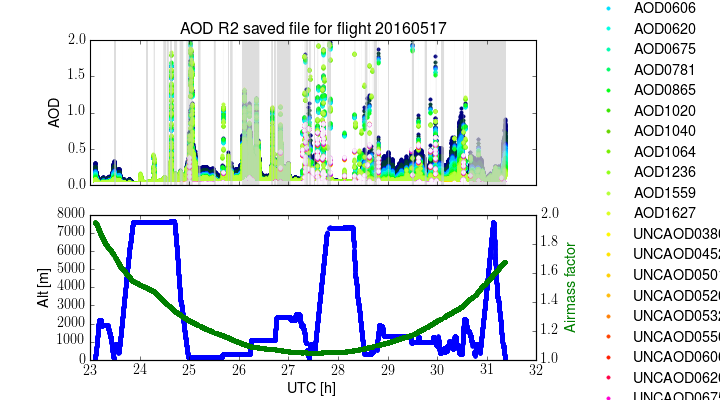

<IPython.core.display.Javascript object>


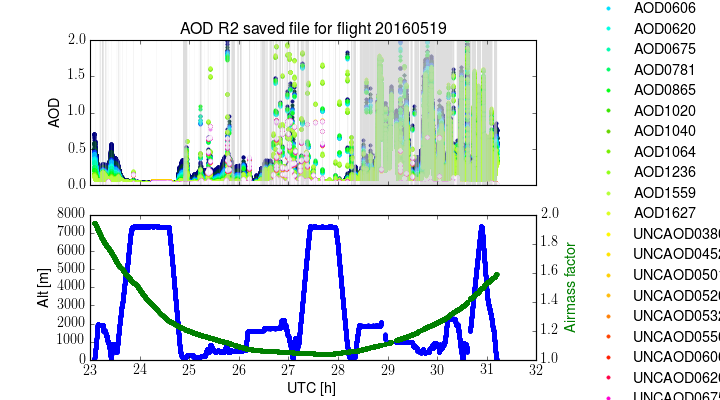

<IPython.core.display.Javascript object>


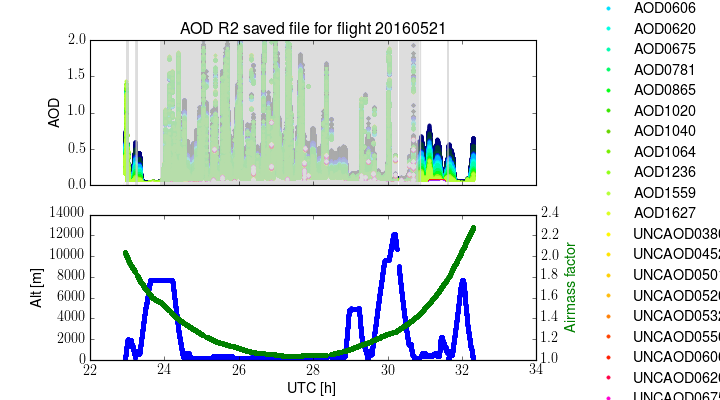

<IPython.core.display.Javascript object>


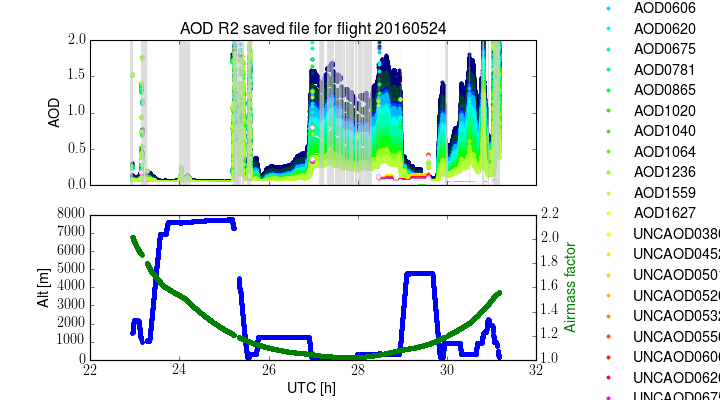

<IPython.core.display.Javascript object>


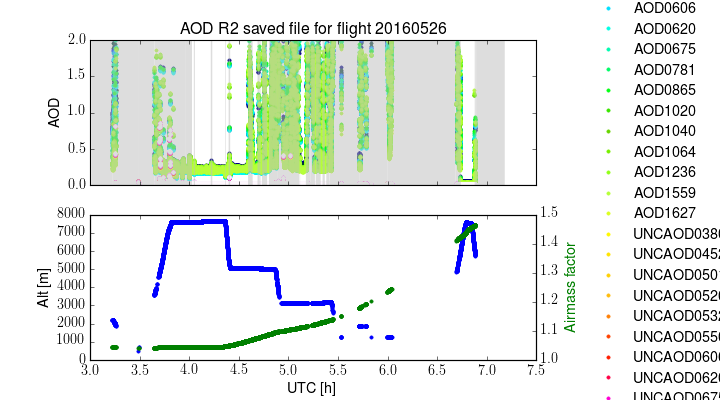

<IPython.core.display.Javascript object>


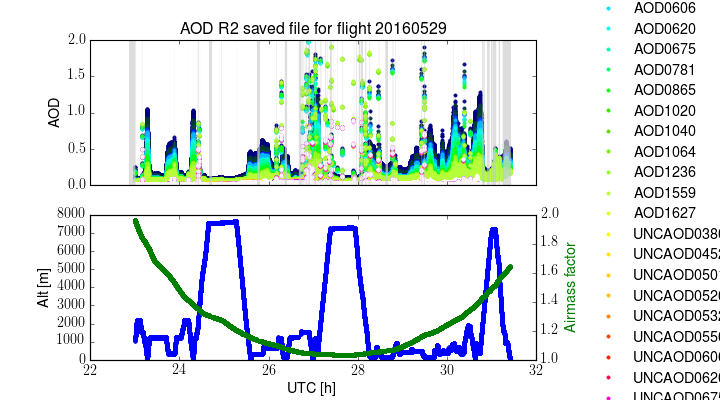

<IPython.core.display.Javascript object>


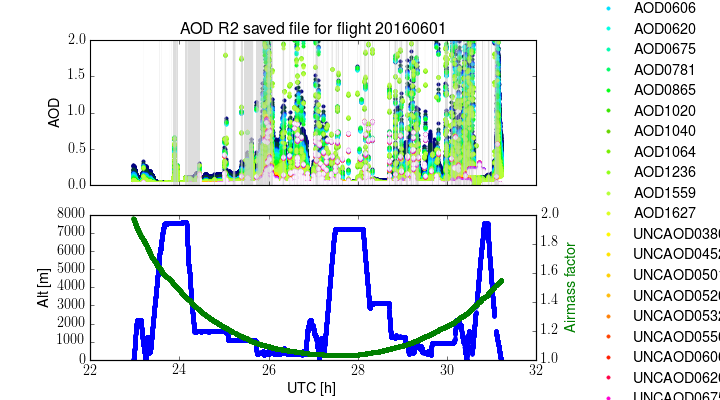

<IPython.core.display.Javascript object>


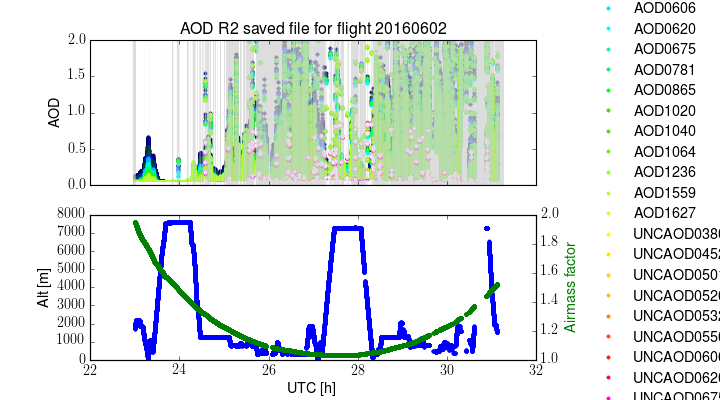

<IPython.core.display.Javascript object>


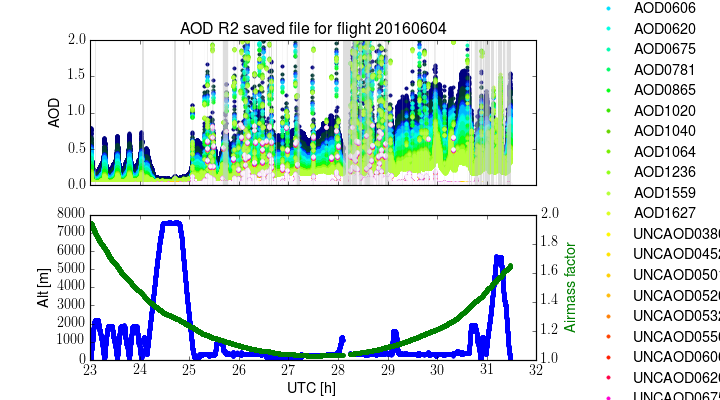

<IPython.core.display.Javascript object>


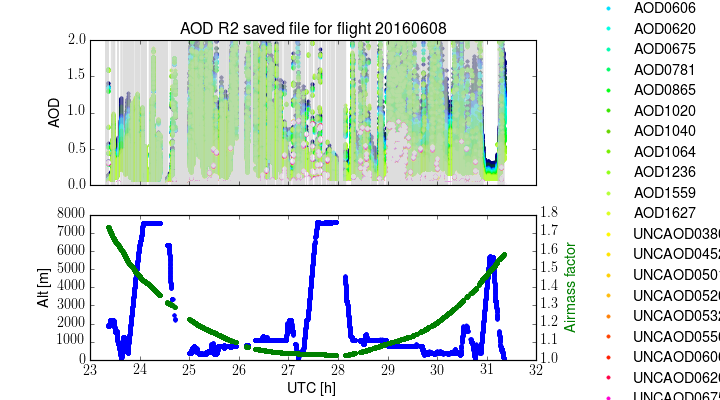

<IPython.core.display.Javascript object>


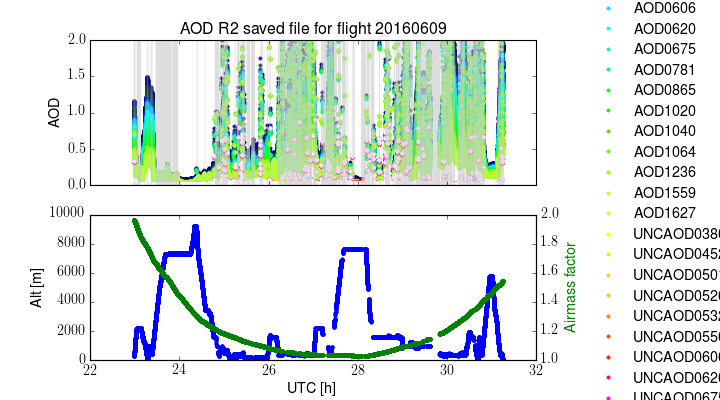

<IPython.core.display.Javascript object>


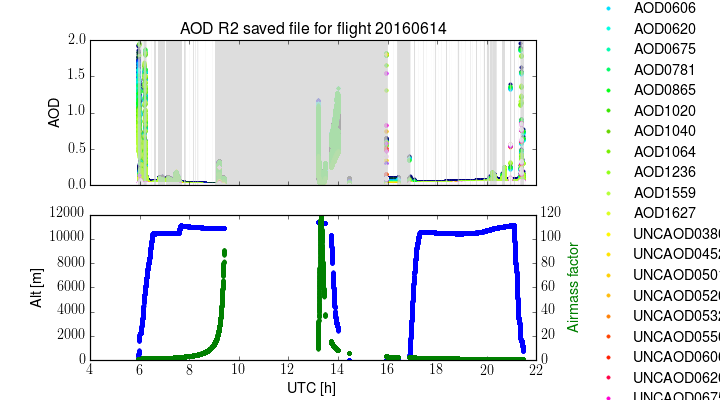

In [16]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {vr} saved file for flight {}'.format(d,vr=vr))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl))])
    for aod in wl:
        ax[0].plot(outaod_RA[i][nm[0]],outaod_RA[i][aod],'.',label=aod)
    try:
        for x in outaod_RA[i][nm[0]][np.where(outaod_RA[i][nm[4]]==1)[0]]:
            ax[0].axvline(x,color='#DDDDDD',alpha=0.02)
    except:
        pass
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,2)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict/{vr}_{}.png'.format(d,vr=vr),dpi=600,transparent=True)

In [17]:
nm[4]

'qual_flag'

In [15]:
fl = np.where(outaod_RA[i][nm[4]]==1)[0]

NameError: name 'i' is not defined

In [16]:
fl.shape

NameError: name 'fl' is not defined

# Plot the uncertainty

In [20]:
nm[30:51]

('UNCAOD0620',
 'UNCAOD0675',
 'UNCAOD0781',
 'UNCAOD0865',
 'UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1559',
 'UNCAOD1627')

In [27]:
wl[0:17]

('AOD0380',
 'AOD0452',
 'AOD0501',
 'AOD0520',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0675',
 'AOD0781',
 'AOD0865',
 'AOD1020',
 'AOD1040',
 'AOD1064',
 'AOD1236',
 'AOD1559',
 'AOD1627')

In [32]:
wl[17:]

('UNCAOD0380',
 'UNCAOD0452',
 'UNCAOD0501',
 'UNCAOD0520',
 'UNCAOD0532',
 'UNCAOD0550',
 'UNCAOD0606',
 'UNCAOD0620',
 'UNCAOD0675',
 'UNCAOD0781',
 'UNCAOD0865',
 'UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1559')

In [37]:
vv=vr

<IPython.core.display.Javascript object>


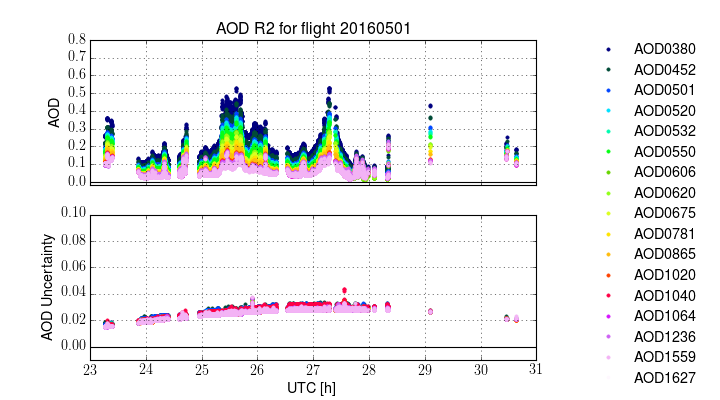

<IPython.core.display.Javascript object>


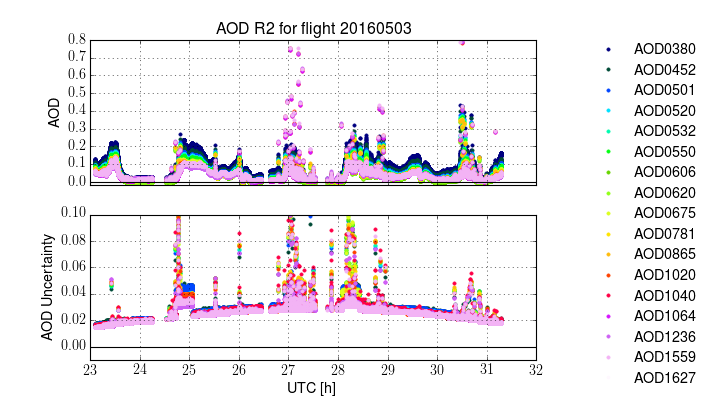

<IPython.core.display.Javascript object>


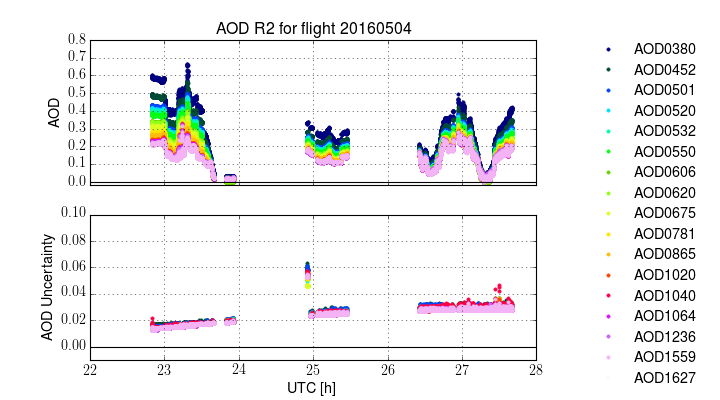

<IPython.core.display.Javascript object>


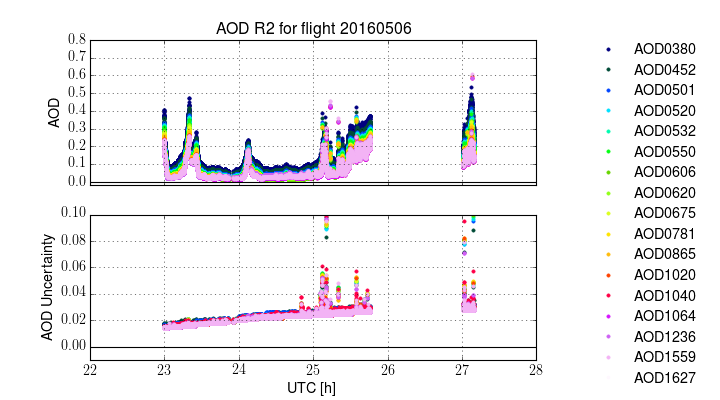

<IPython.core.display.Javascript object>


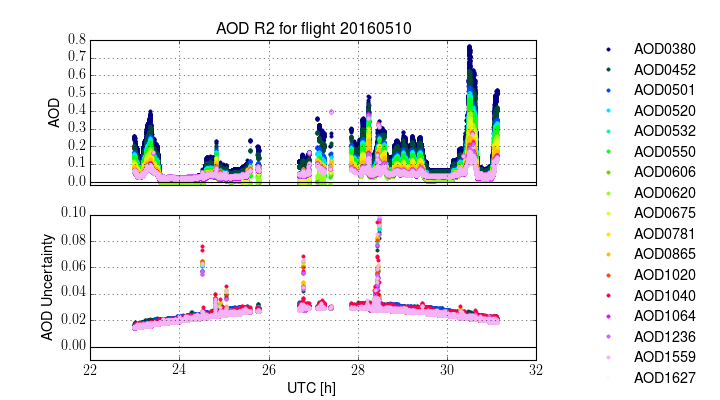

<IPython.core.display.Javascript object>


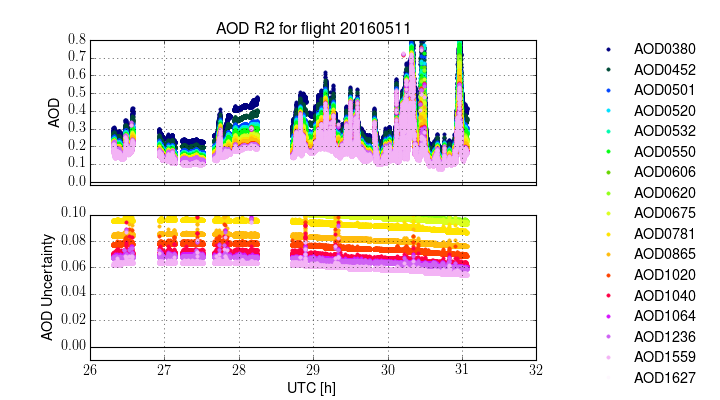

<IPython.core.display.Javascript object>


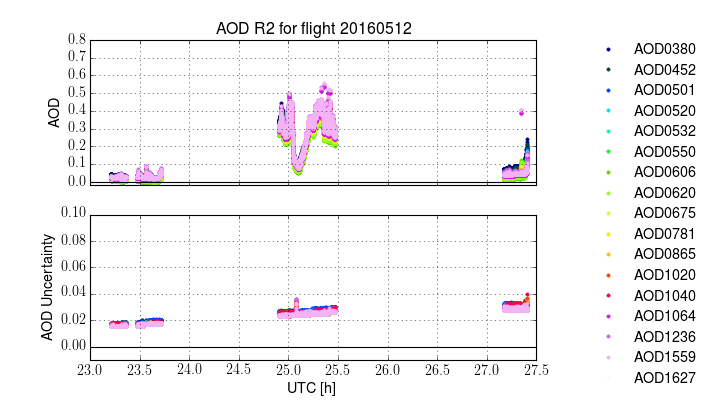

<IPython.core.display.Javascript object>


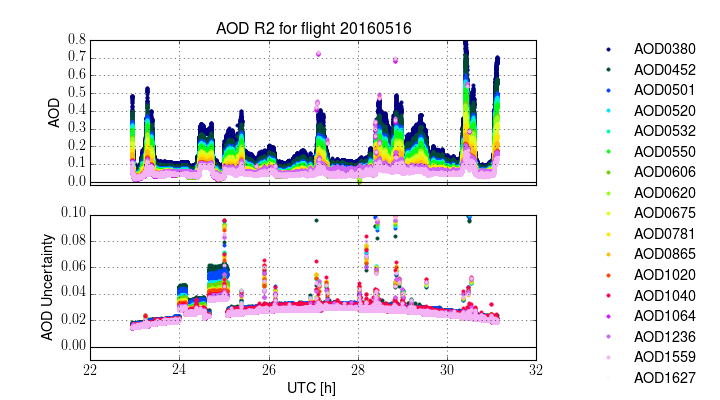

<IPython.core.display.Javascript object>


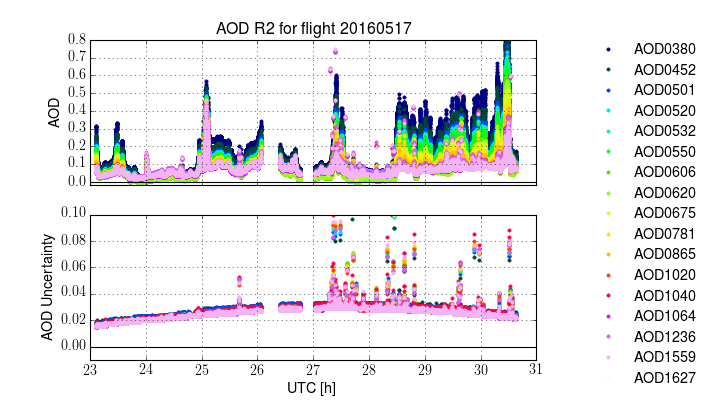

<IPython.core.display.Javascript object>


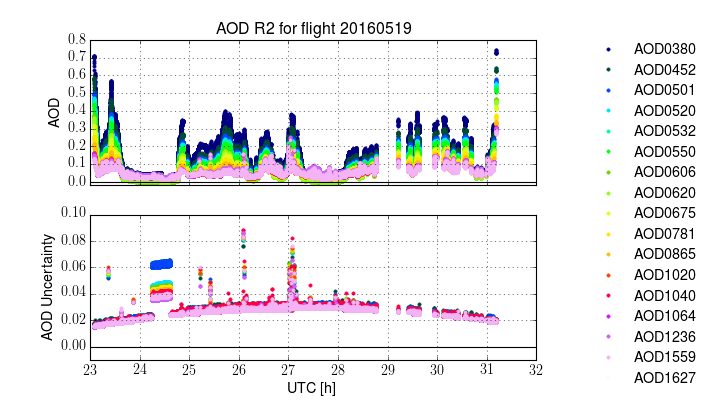

<IPython.core.display.Javascript object>


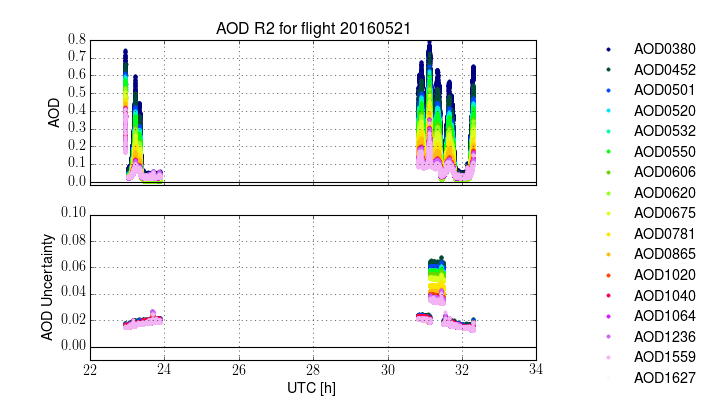

<IPython.core.display.Javascript object>


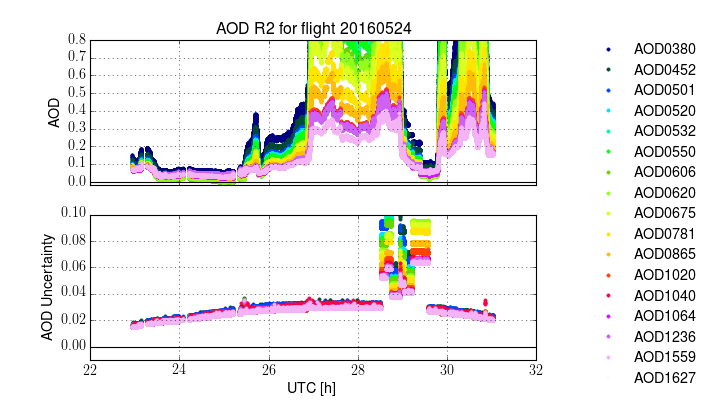

<IPython.core.display.Javascript object>


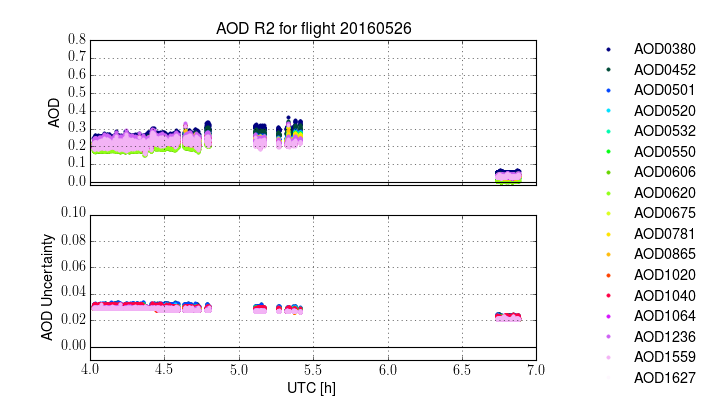

<IPython.core.display.Javascript object>


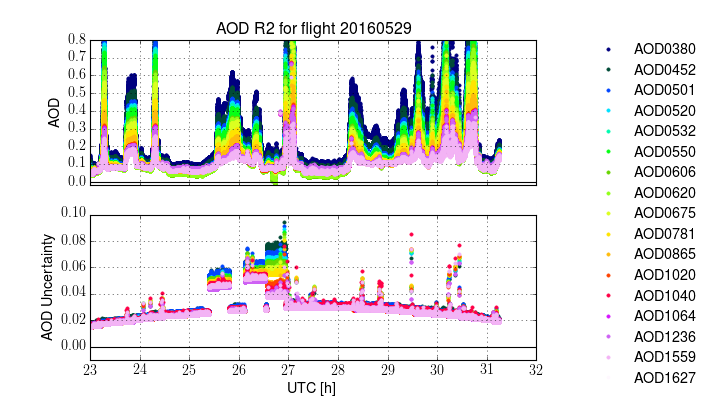

<IPython.core.display.Javascript object>


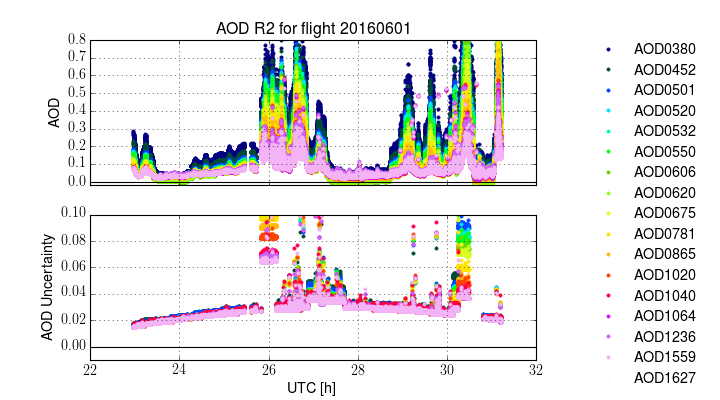

<IPython.core.display.Javascript object>


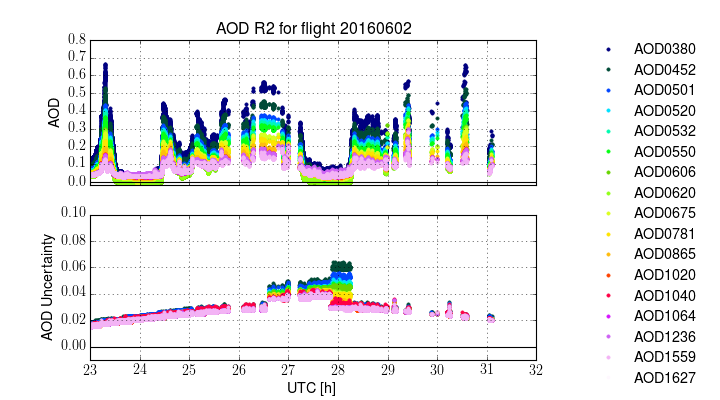

<IPython.core.display.Javascript object>


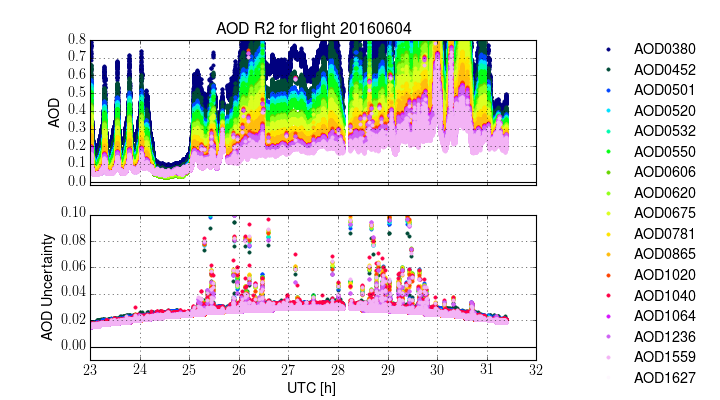

<IPython.core.display.Javascript object>


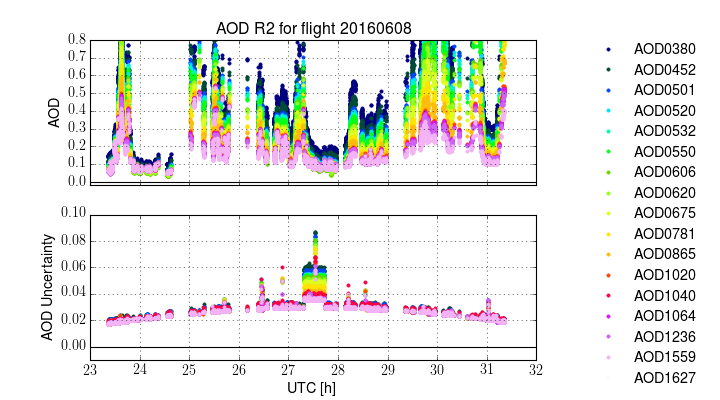

<IPython.core.display.Javascript object>


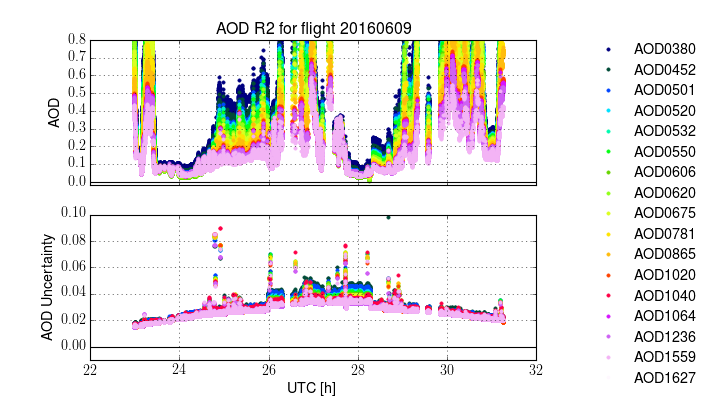

<IPython.core.display.Javascript object>


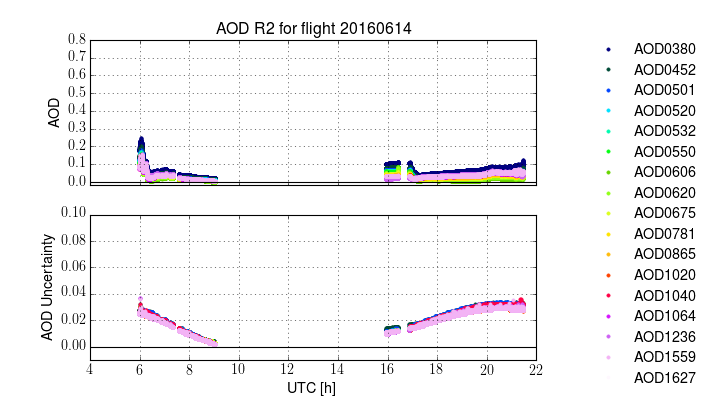

In [38]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} for flight {}'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[0:16])+1)])
    for aod in wl[0:17]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.8)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[0:16])+1)])
    for unc in wl[17:]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[1].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][unc][ii],'.',label=aod)
    ax[1].set_ylabel('AOD Uncertainty')
    ax[1].set_ylim(-0.01,0.1)
    ax[1].grid()
    ax[1].axhline(0,color='k')
    
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict/{vv}_AOD_uncert_{}.png'.format(d,vv=vr),dpi=600,transparent=True)

In [ ]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Gas {vr} saved file for flight {}'.format(d,vr=vr))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl))])
    for aod in wl:
        ax[0].plot(outgas_RA[i][nm[0]],outgas_RA[i][aod],'.',label=aod)
    try:
        for x in outgas_RA[i][nm[0]][np.where(outgas_RA[i][nm[4]]==1)[0]]:
            ax[0].axvline(x,color='#DDDDDD',alpha=0.02)
    except:
        pass
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,3)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict/{vr}_{}.png'.format(d,vr=vr),dpi=600,transparent=True)

In [17]:
outgas_RA[0].dtype.names

IndexError: list index out of range

<IPython.core.display.Javascript object>


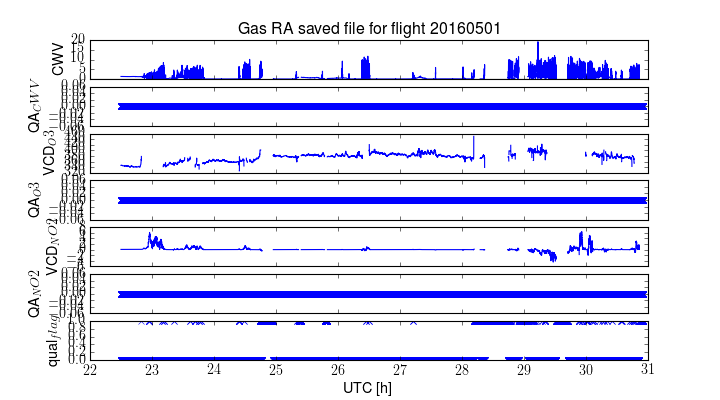

<IPython.core.display.Javascript object>


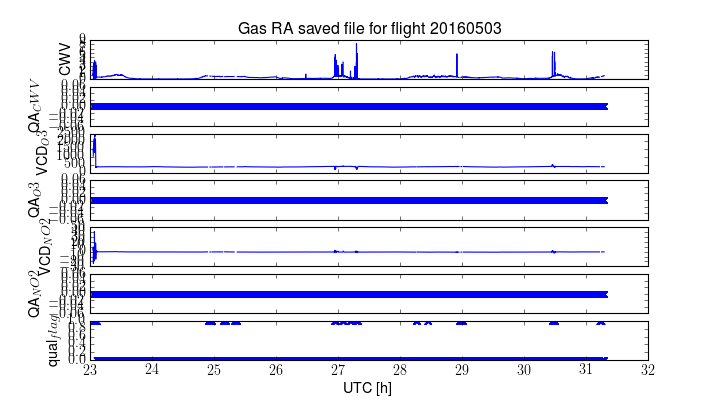

<IPython.core.display.Javascript object>


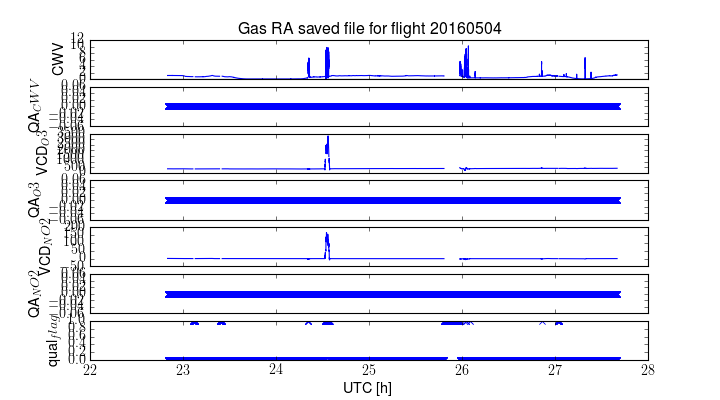

<IPython.core.display.Javascript object>


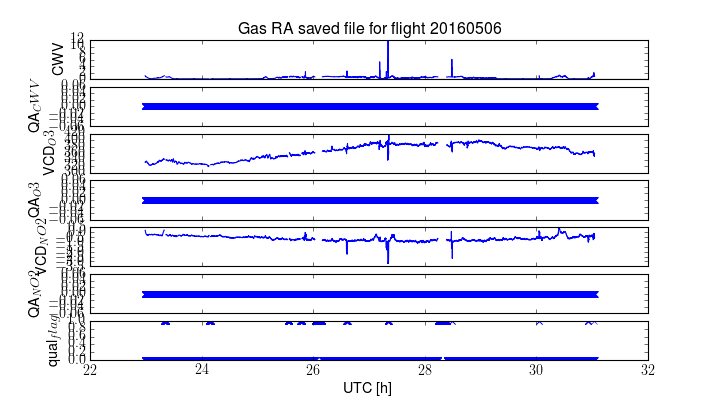

In [36]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(7,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Gas RA saved file for flight {}'.format(d))
    
    ax[0].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['CWV'])
    ax[0].set_ylabel('CWV')
    #ax[0].set_ylim(0,3)
    ax[0].axhline(0,color='k')
    #box = ax[0].get_position()
    #ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_CWV'],'x')
    ax[1].set_ylabel('QA_CWV')
    
    ax[2].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['VCD_O3'])
    ax[2].set_ylabel('VCD_O3')
    
    ax[3].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_O3'],'x')
    ax[3].set_ylabel('QA_O3')
    
    ax[4].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['VCD_NO2'])
    ax[4].set_ylabel('VCD_NO2')
    
    ax[5].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_NO2'],'x')
    ax[5].set_ylabel('QA_NO2')
    
    ax[6].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['qual_flag'],'x')
    ax[6].set_ylabel('qual_flag')
    
    ax[6].set_xlabel('UTC [h]')

# Combineall the data into a single array

In [39]:
ar = {}
for n in nm:
    ar[n] = np.array([])

In [40]:
ar['days'] = np.array([])

In [41]:
for i,d in enumerate(days):
    ar['days'] = np.append(ar['days'],np.zeros_like(outaod_RA[i]['Start_UTC'])+i)
    for n in nm:
        ar[n] = np.append(ar[n],outaod_RA[i][n])

In [42]:
ar['GPS_Alt'].shape

(583183,)

## Save the combined data

In [43]:
import hdf5storage as hs

In [51]:
hs.savemat(fp+'/aod_ict/all_aod_KORUS_{}_ict.mat'.format(vr),ar)

## Filterout bad data

In [45]:
ar['fl_QA'] = ar['qual_flag']==0

In [46]:
ar['fl'] = ar['fl_QA']

In [47]:
ar['fl_alt'] = ar['GPS_Alt']<=1500

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


In [48]:
ar['fl_alt1'] = ar['GPS_Alt']<=600

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


In [49]:
ar['fl1'] = ar['fl_QA']&ar['fl_alt']

In [50]:
ar['fl2'] = ar['fl_QA']&ar['fl_alt1']

## Plot out all the data

In [28]:
from plotting_utils import prelim

<IPython.core.display.Javascript object>


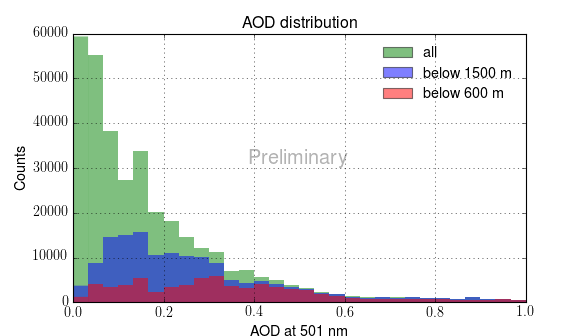

In [29]:
plt.figure()
plt.hist(ar['AOD0501'][ar['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='g',label='all')
plt.hist(ar['AOD0501'][ar['fl1']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='below 1500 m')
plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='below 600 m')
#plt.yscale('log')
plt.xlabel('AOD at 501 nm')
plt.ylabel('Counts')
plt.grid()
plt.title('AOD distribution')
prelim()
plt.legend(frameon=False)
plt.savefig(fp+'aod_ict/{vv}_AOD_histogram.png'.format(vv=vr),dpi=600,transparent=True)

In [29]:
np.nanmean(ar['AOD0501'][ar['fl2']])

0.41398353623832196

In [30]:
np.nanmedian(ar['AOD0501'][ar['fl2']])

0.32400000000000001